In [1]:
# 라이브러리 추가
import urllib.request
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터랩 API를 이용한 검색량 조회 함수(최대 5개)
def datalab_api(keywords):

    # 데이터랩 API
    client_id = "89L30Y3xCshEctCoab1v"
    client_secret = "aIoL3WXAsj"

    url = "https://openapi.naver.com/v1/datalab/search"

    body = {
        "startDate":"2016-01-01",
        "endDate":"2019-06-30",
        "timeUnit":"date",
        "keywordGroups":[
            {"groupName":str(keywords[0]),"keywords":[str(keywords[0])]},
            {"groupName":str(keywords[1]),"keywords":[str(keywords[1])]},
            {"groupName":str(keywords[2]),"keywords":[str(keywords[2])]},
            {"groupName":str(keywords[3]),"keywords":[str(keywords[3])]},
            {"groupName":str(keywords[4]),"keywords":[str(keywords[4])]},
        ],
    }
    body = json.dumps(body)

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    json_obj = json.loads(response.read().decode('utf-8'))

    # 데이터프레임
    df1 = pd.DataFrame(json_obj['results'][0]['data']); df1.columns=['기간', str(keywords[0])]
    df2 = pd.DataFrame(json_obj['results'][1]['data']); df2.columns=['기간', str(keywords[1])]
    df3 = pd.DataFrame(json_obj['results'][2]['data']); df3.columns=['기간', str(keywords[2])]
    df4 = pd.DataFrame(json_obj['results'][3]['data']); df4.columns=['기간', str(keywords[3])]
    df5 = pd.DataFrame(json_obj['results'][4]['data']); df5.columns=['기간', str(keywords[4])]
    
    # 데이터프레임 병합
    df2 = df1.merge(df2, how='outer', on='기간').fillna(0)
    df3 = df2.merge(df3, how='outer', on='기간').fillna(0)
    df4 = df3.merge(df4, how='outer', on='기간').fillna(0)
    df5 = df4.merge(df5, how='outer', on='기간').fillna(0)
    
    return df5

In [3]:
# 최소-최대 정규화를 적용한 데이터랩 검색량 조회 함수 (무제한)
def datalab_api_kw_list(kw_list):

    # df: '국립공원' 검색량 최소값, 최대값
    df = datalab_api(kw_list[0]+kw_list[1])
    a, b = df.iloc[:,1].min(), df.iloc[:,1].max()

    i=2
    while i < len(kw_list):
        df1 = datalab_api(kw_list[0]+kw_list[i])
        # df1: 국립공원 컬럼의 최소값, 최대값
        x, y = df1.iloc[:,1].min(), df1.iloc[:,1].max()
        # 최소-최대 정규화
        df1.iloc[:,2] = (df1.iloc[:,2] - x) / (y - x) * (b - a) + a
        df1.iloc[:,3] = (df1.iloc[:,3] - x) / (y - x) * (b - a) + a
        df1.iloc[:,4] = (df1.iloc[:,4] - x) / (y - x) * (b - a) + a
        df1.iloc[:,5] = (df1.iloc[:,5] - x) / (y - x) * (b - a) + a
        df1 = df1.drop(columns=['기간', '국립공원'])
        df = pd.concat([df, df1], axis=1)
        i+=1
    
    # '테스트' 검색량 삭제
    df = df[df.columns.drop(list(df.filter(regex='테스트')))]
    
    return df

In [4]:
# 키워드 리스트 (깃대종 41개)
kw_list = [['국립공원'],
           ['한려해상', '태안해안', '다도해해상', '가야산'],
           ['한라산', '계룡산', '내장산', '태백산'],
           ['경주', '덕유산', '무등산', '변산반도'],
           ['북한산', '설악산', '소백산', '속리산'],
           ['오대산', '월악산', '월출산', '주왕산'],
           ['지리산', '치악산', '테스트', '테스트']]

In [5]:
# 데이터랩 깃대종
df = datalab_api_kw_list(kw_list)

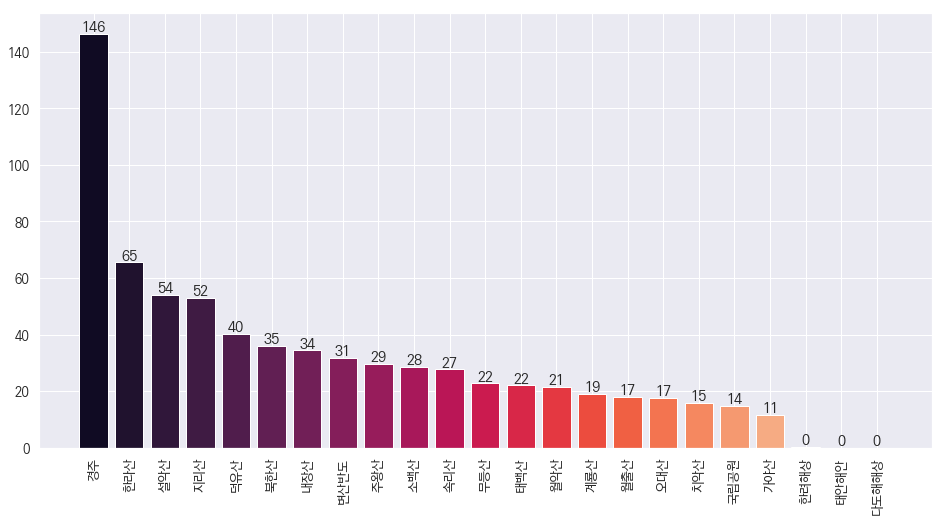

In [6]:
# 전체 22개 국립공원의 검색량 비교를 위한 바 플롯
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
df = pd.DataFrame(df.mean().sort_values(ascending=False), columns=['검색량'])
f, ax = plt.subplots(figsize=(16, 8));  plt.xticks(rotation=90)
plot = ax.bar(df.index, df['검색량'], color=sns.color_palette("rocket", len(df.index)))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

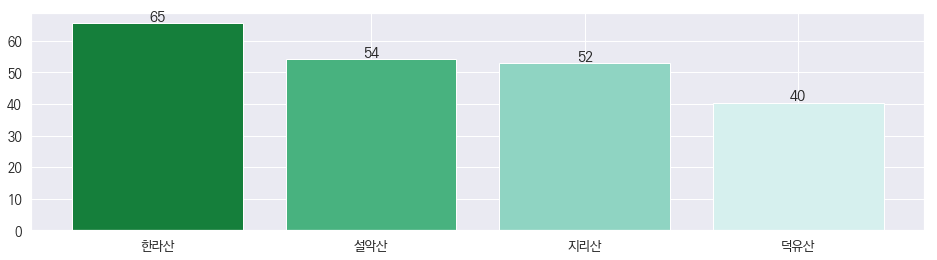

In [7]:
# 산악형
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
df1 = df.loc[df.index.isin(['한라산', '설악산', '지리산', '덕유산'])]
f, ax = plt.subplots(figsize=(16, 4));  plt.xticks(rotation=0)
plot = ax.bar(df1.index, df1['검색량'], color=sns.color_palette("BuGn_r", len(df1.index)))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')

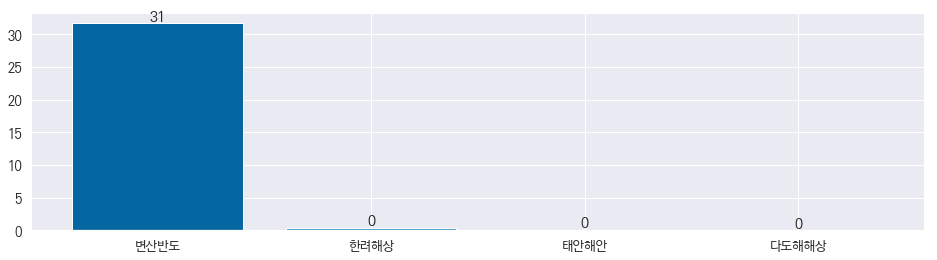

In [8]:
# 해상형
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
df1 = df.loc[df.index.isin(['변산반도', '한려해상', '태안해안', '다도해해상'])]
f, ax = plt.subplots(figsize=(16, 4));  plt.xticks(rotation=0)
plot = ax.bar(df1.index, df1['검색량'], color=sns.color_palette("PuBu_r", len(df1.index)))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG03.png', bbox_inches='tight')

In [9]:
# 키워드 리스트 (깃대종 41개)
kw_list = [['국립공원'],
           ['한려해상국립공원', '태안해안국립공원', '다도해해상국립공원', '가야산국립공원'],
           ['한라산국립공원', '계룡산국립공원', '내장산국립공원', '태백산국립공원'],
           ['경주국립공원', '덕유산국립공원', '무등산국립공원', '변산반도국립공원'],
           ['북한산국립공원', '설악산국립공원', '소백산국립공원', '속리산국립공원'],
           ['오대산국립공원', '월악산국립공원', '월출산국립공원', '주왕산국립공원'],
           ['지리산국립공원', '치악산국립공원', '테스트', '테스트']]

In [10]:
# 데이터랩 깃대종
df = datalab_api_kw_list(kw_list)

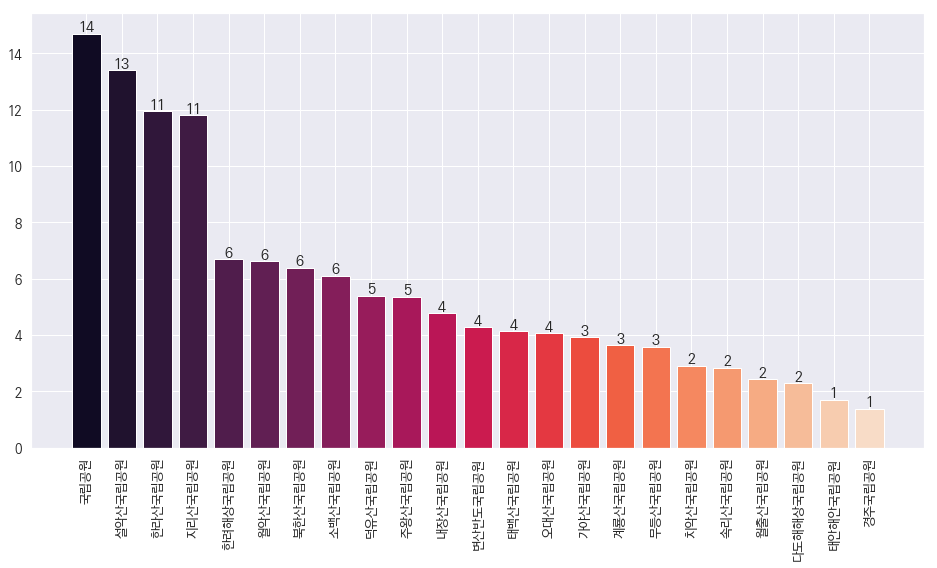

In [11]:
# 전체 22개 국립공원의 검색량 비교를 위한 바 플롯
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
df = pd.DataFrame(df.mean().sort_values(ascending=False), columns=['검색량'])
f, ax = plt.subplots(figsize=(16, 8));  plt.xticks(rotation=90)
plot = ax.bar(df.index, df['검색량'], color=sns.color_palette("rocket", len(df.index)))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG04.png', bbox_inches='tight')

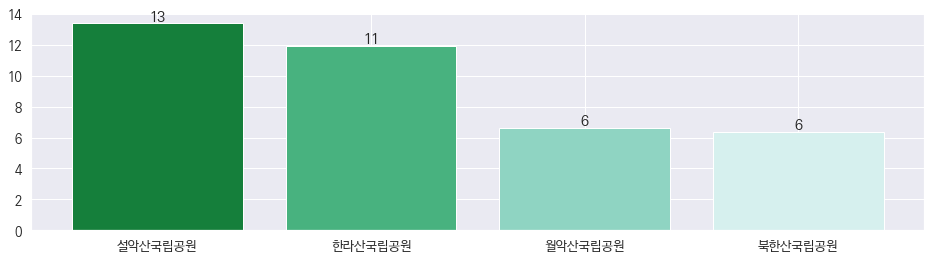

In [12]:
# 산악형
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
df1 = df.loc[df.index.isin(['설악산국립공원', '한라산국립공원', '월악산국립공원', '북한산국립공원'])]
f, ax = plt.subplots(figsize=(16, 4));  plt.xticks(rotation=0)
plot = ax.bar(df1.index, df1['검색량'], color=sns.color_palette("BuGn_r", len(df1.index)))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG05.png', bbox_inches='tight')

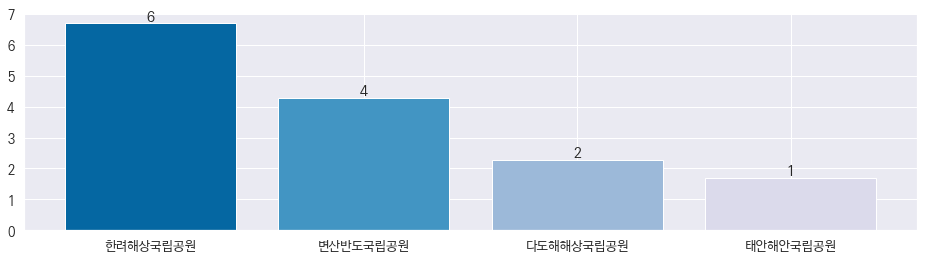

In [13]:
# 해상형
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
df1 = df.loc[df.index.isin(['한려해상국립공원', '변산반도국립공원', '다도해해상국립공원', '태안해안국립공원'])]
f, ax = plt.subplots(figsize=(16, 4));  plt.xticks(rotation=0)
plot = ax.bar(df1.index, df1['검색량'], color=sns.color_palette("PuBu_r", len(df1.index)))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG06.png', bbox_inches='tight')